In [2]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
%matplotlib inline
import seaborn as sns; sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import math

/opt/anaconda3/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string

Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
#read Seattle sidewalk geometry
sidewalk = gpd.read_file('datasets/02-seattle-sidewalk/Sidewalks/Sidewalks.shp')
sidewalk

,OBJECTID,COMPKEY,COMPTYPE,SEGKEY,UNITID,UNITTYPE,UNITDESC,ADDBY,ADDDTTM,ASBLT,CONDITION,CONDITION_,CURBTYPE,CURRENT_ST,CURRENT__1,FILLERTYPE,FILLERWID,INSTALL_DA,SW_WIDTH,MAINTAINED,MATL,MODBY,MODDTTM,OWNERSHIP,SIDE,SURFTYPE,BUILDERCD,MAINTBYRDW,SWINCOMPLE,MULTIPLESU,GSITYPECD,DATE_MVW_L,PRIMARYDIS,SECONDARYD,OVERRIDEYN,OVERRIDECO,SRTS_SIDEW,PRIMARYCRO,MINIMUMVAR,LAST_VERIF,COLOR,OWNERSHIP_,NATURE_OF_,MAINT_FINA,SW_CATEGOR,VARIABLEWI,MAINTENANC,SHAPE_Leng,geometry
0,1,328242,97,9309,SDW-30390,SDW,"BOREN AVE BETWEEN JEFFERSON ST AND JAMES ST, N...",SW DATA LOAD,2007-09-26,None,GOOD,2017-06-30,MONO,INSVC,2010-07-31,TR/PCC,60,None,60,None,None,SIDEWALK COLLECTOR,2018-02-07,None,NE,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,2.3,0,2017-06-30,None,None,None,None,BLOCK,N,SSRP_C4_SWShim,259.226600,"LINESTRING (-122.32182 47.60587, -122.32237 47..."
1,2,328243,97,9308,SDW-30391,SDW,"BOREN AVE BETWEEN TERRACE ST AND JEFFERSON ST,...",SW DATA LOAD,2007-09-26,None,FAIR,2017-06-30,410A,INSVC,2010-07-31,AC,18,None,96,None,None,SIDEWALK COLLECTOR,2018-02-07,None,SW,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,0.4,0,2017-06-30,None,None,None,None,BLOCK,N,SSRP_C4_SWShim,259.229841,"LINESTRING (-122.32138 47.60504, -122.32193 47..."
2,3,328244,97,9308,SDW-43317,SDW,"BOREN AVE BETWEEN TERRACE ST AND JEFFERSON ST,...",SW DATA LOAD,2007-09-26,None,GOOD,2017-06-30,410A,INSVC,2010-07-31,LSCP,30,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,NE,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,2.4,0,2017-06-30,None,None,None,None,BLOCK,N,SSRP_C4_SWShim,259.229392,"LINESTRING (-122.32115 47.60513, -122.32170 47..."
3,4,328245,97,9307,SDW-30392,SDW,"BOREN AVE BETWEEN BROADWAY AND TERRACE ST, SW ...",SW DATA LOAD,2007-09-26,None,GOOD,2017-06-30,410C,INSVC,2010-07-31,LSCP,18,None,96,None,None,SIDEWALK COLLECTOR,2018-02-07,None,SW,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,2.1,0,2017-06-30,None,None,None,None,BLOCK,N,SSRP_C4_SWShim,178.386732,"LINESTRING (-122.32087 47.60450, -122.32125 47..."
4,5,328246,97,9307,SDW-30393,SDW,"BOREN AVE BETWEEN BROADWAY AND TERRACE ST, NE ...",SW DATA LOAD,2007-09-26,None,EXCELLENT,2017-06-30,410C,INSVC,2010-07-31,LSCP,18,None,72,None,None,SR1146066,2021-08-27,PARK,NE,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.5,0,2017-06-30,None,2021-08-27,None,None,BLOCK,N,SSRP_C4_SWShim,121.582237,"LINESTRING (-122.32084 47.60480, -122.32110 47..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46189,46251,292312,97,8645,SDW-3113,SDW,9 UPPER AVE W BETWEEN W GALER ST AND W BLAINE ...,SW DATA LOAD,2007-09-26,None,None,None,410C,INSVC,None,NONE,0,None,0,None,None,NGOC,2017-07-26,None,W,UIMPRV,None,N,N,N,None,2022-06-17,DISTRICT7,None,N,None,2.0,0.0,0,None,None,None,None,None,None,N,None,854.528595,"LINESTRING (-122.36912 47.63237, -122.36907 47..."
46190,46252,290185,97,3506,SDW-1055,SDW,23RD PL NE BETWEEN NE 133RD ST AND NE 135TH ST...,SW DATA LOAD,2007-09-26,None,None,None,NONE,INSVC,2017-07-26,NONE,0,None,0,None,None,FEGLEYC,2017-07-26,None,W,UIMPRV,None,N,N,N,None,2022-06-17,DISTRICT5,None,N,None,2.0,0.0,0,None,None,None,None,None,None,N,None,633.069791,"LINESTRING (-122.30332 47.72479, -122.30339 47..."
46191,46253,290665,97,4808,SDW-1158,SDW,31ST AVE NE BETWEEN NE 130TH ST AND NE 133RD S...,SW DATA LOAD,2007-09-26,None,None,None,NONE,INSVC,2017-07-26,NONE,0,None,0,None,None,FEGLEYC,2017-07-26,None,W,UIMPRV,None,N,N,N,None,2022-06-17,DISTRICT5,None,N,None,2.0,0.0,0,None,None,None,None,None,None,N,None,631.226787,"LINESTRING (-122.29468 47.72294, -122.29468 47..."
46192,46254,313714,97,4700,SDW-18526,SDW,30TH AVE S BETWEEN S FERDINAND ST AND S DAWSON...,SW DATA LOAD,2007-09-26,None,None,None,NONE,INSVC,None,NONE,0,None,0,None,None,FEGLEYC,2017-07-26,None,E,UIMPRV,None,N,N,N,None,2022-06-17,DISTRICT2,None,N,None,2.0,

In [4]:
#read Project Sidewalk labels
labels = gpd.read_file('datasets/01-project-sidewalk-labels/attributes_20220817.json')
labels

,attribute_id,label_type,street_edge_id,osm_street_id,neighborhood,severity,is_temporary,agree_count,disagree_count,notsure_count,geometry
0,57259626,CurbRamp,22481,394459713,Portage Bay,3.0,False,0,0,1,POINT (-122.32030 47.64312)
1,57259627,CurbRamp,12051,13521798,Portage Bay,1.0,False,2,0,0,POINT (-122.32189 47.64326)
2,57259629,CurbRamp,12051,13521798,Portage Bay,1.0,False,2,1,0,POINT (-122.32210 47.64312)
3,57259630,CurbRamp,22481,394459713,Portage Bay,1.0,False,1,0,0,POINT (-122.32017 47.64315)
4,57259632,CurbRamp,6732,6456858,Portage Bay,1.0,False,2,0,0,POINT (-122.32120 47.65138)
...,...,...,...,...,...,...,...,...,...,...,...
95874,59553217,Crosswalk,6888,6459611,Seward Park,1.0,False,6,0,0,POINT (-122.27009 47.55486)
95875,59553221,Crosswalk,15374,157473794,Seward Park,4.0,False,6,1,0,POINT (-122.25755 47.54949)
95876,59553224,Crosswalk,10102,6512294,Seward Park,2.0,False,12,0,0,POINT (-122.25774 47.54966)
95877,59553225,Crosswalk,4049,6409188,Seward Park,5.0,False,2,6,0,POINT (-122.26946 47.56184)


In [5]:
#Match coordinates
sidewalk = sidewalk.to_crs("EPSG:2285")
labels = labels.to_crs("EPSG:2285")

In [6]:
#Spatial join project sidewalk labels to sidewalk geometry
labels_mapped_on_sidewalk = labels.sjoin_nearest(sidewalk, distance_col='distance', max_distance = 30)
labels_mapped_on_sidewalk

,attribute_id,label_type,street_edge_id,osm_street_id,neighborhood,severity,is_temporary,agree_count,disagree_count,notsure_count,geometry,index_right,OBJECTID,COMPKEY,COMPTYPE,SEGKEY,UNITID,UNITTYPE,UNITDESC,ADDBY,ADDDTTM,ASBLT,CONDITION,CONDITION_,CURBTYPE,CURRENT_ST,CURRENT__1,FILLERTYPE,FILLERWID,INSTALL_DA,SW_WIDTH,MAINTAINED,MATL,MODBY,MODDTTM,OWNERSHIP,SIDE,SURFTYPE,BUILDERCD,MAINTBYRDW,SWINCOMPLE,MULTIPLESU,GSITYPECD,DATE_MVW_L,PRIMARYDIS,SECONDARYD,OVERRIDEYN,OVERRIDECO,SRTS_SIDEW,PRIMARYCRO,MINIMUMVAR,LAST_VERIF,COLOR,OWNERSHIP_,NATURE_OF_,MAINT_FINA,SW_CATEGOR,VARIABLEWI,MAINTENANC,SHAPE_Leng,distance
0,57259626,CurbRamp,22481,394459713,Portage Bay,3.0,False,0,0,1,POINT (1273886.044 238131.566),27064,27065,311888,97,14727,SDW-15994,SDW,E ROANOKE ST BETWEEN BROADWAY E AND 10TH W AVE...,SW DATA LOAD,2007-09-26,None,GOOD,2017-07-12,410C,INSVC,2007-09-26,LSCP,53,None,72,None,None,SR1146066,2021-08-27,PARK,S,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,2.7,0,2017-07-12,None,2021-08-27,None,None,BLOCK,N,SSRP_NE2_SWShim,169.539271,2.414973
1,57259627,CurbRamp,12051,13521798,Portage Bay,1.0,False,2,0,0,POINT (1273494.014 238189.248),27067,27068,311891,97,14726,SDW-15997,SDW,E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...,SW DATA LOAD,2007-09-26,None,FAIR,2017-07-12,410C,INSVC,2007-09-26,LSCP,52,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,N,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.7,0,2017-07-12,None,None,None,None,BLOCK,N,SSRP_NE2_SWShim,278.447568,3.306227
35,57259744,NoSidewalk,12051,13521798,Portage Bay,3.0,False,0,0,0,POINT (1273599.395 238191.385),27067,27068,311891,97,14726,SDW-15997,SDW,E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...,SW DATA LOAD,2007-09-26,None,FAIR,2017-07-12,410C,INSVC,2007-09-26,LSCP,52,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,N,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.7,0,2017-07-12,None,None,None,None,BLOCK,N,SSRP_NE2_SWShim,278.447568,0.549057
47761,57259940,SurfaceProblem,12051,13521798,Portage Bay,3.0,False,1,1,0,POINT (1273644.551 238191.904),27067,27068,311891,97,14726,SDW-15997,SDW,E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...,SW DATA LOAD,2007-09-26,None,FAIR,2017-07-12,410C,INSVC,2007-09-26,LSCP,52,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,N,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.7,0,2017-07-12,None,None,None,None,BLOCK,N,SSRP_NE2_SWShim,278.447568,1.803940
71880,57259979,SurfaceProblem,12051,13521798,Portage Bay,3.0,False,0,1,1,POINT (1273580.618 238193.140),27067,27068,311891,97,14726,SDW-15997,SDW,E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...,SW DATA LOAD,2007-09-26,None,FAIR,2017-07-12,410C,INSVC,2007-09-26,LSCP,52,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,N,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.7,0,2017-07-12,None,None,None,None,BLOCK,N,SSRP_NE2_SWShim,278.447568,1.997462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95865,59553185,NoCurbRamp,26384,537696519,Seward Park,3.0,False,2,0,0,POINT (1286341.985 202471.745),37223,37224,322238,97,20136,SDW-22406,SDW,S GRAHAM ST BETWEEN 52ND W AVE S AND 52ND E AV...,SW DATA LOAD,2007-09-26,None,GOOD,2017-06-22,410C,INSVC,2007-09-26,PCC,12,None,60,None,None,SIDEWALK COLLECTOR,2018-02-07,None,S,PCC,None,N,N,N,None,2022-06-17,DISTRICT2,None,N,None,1.0,1.9,0,2017-06-22,None,None,None,None,BLOCK,N,SSRP_SSW2_SWShim,193.122458,5.747419
95868,59553199,NoCurbRamp,15470,157481951,Seward Park,5.0,False,1,1,0,POINT (1286519.913 200489.421),33726,33727,318811,97,12802,SDW-40906,SDW,SEWARD PARK AVE S BETWEEN S WILLOW ST AND S FR...,SW DATA LOAD,2007-09-26,None,FAIR,2017-06-22,410C,INSVC,2007-09-26,LSCP,76,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,NW,PCC,None,N,N,N,None,2022-06-17,DISTRICT2,None,N,None,3.0

In [7]:
#Cleaning data
df = labels_mapped_on_sidewalk.dropna(subset=['severity']) #Takeout Severity NA data
df

,attribute_id,label_type,street_edge_id,osm_street_id,neighborhood,severity,is_temporary,agree_count,disagree_count,notsure_count,geometry,index_right,OBJECTID,COMPKEY,COMPTYPE,SEGKEY,UNITID,UNITTYPE,UNITDESC,ADDBY,ADDDTTM,ASBLT,CONDITION,CONDITION_,CURBTYPE,CURRENT_ST,CURRENT__1,FILLERTYPE,FILLERWID,INSTALL_DA,SW_WIDTH,MAINTAINED,MATL,MODBY,MODDTTM,OWNERSHIP,SIDE,SURFTYPE,BUILDERCD,MAINTBYRDW,SWINCOMPLE,MULTIPLESU,GSITYPECD,DATE_MVW_L,PRIMARYDIS,SECONDARYD,OVERRIDEYN,OVERRIDECO,SRTS_SIDEW,PRIMARYCRO,MINIMUMVAR,LAST_VERIF,COLOR,OWNERSHIP_,NATURE_OF_,MAINT_FINA,SW_CATEGOR,VARIABLEWI,MAINTENANC,SHAPE_Leng,distance
0,57259626,CurbRamp,22481,394459713,Portage Bay,3.0,False,0,0,1,POINT (1273886.044 238131.566),27064,27065,311888,97,14727,SDW-15994,SDW,E ROANOKE ST BETWEEN BROADWAY E AND 10TH W AVE...,SW DATA LOAD,2007-09-26,None,GOOD,2017-07-12,410C,INSVC,2007-09-26,LSCP,53,None,72,None,None,SR1146066,2021-08-27,PARK,S,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,2.7,0,2017-07-12,None,2021-08-27,None,None,BLOCK,N,SSRP_NE2_SWShim,169.539271,2.414973
1,57259627,CurbRamp,12051,13521798,Portage Bay,1.0,False,2,0,0,POINT (1273494.014 238189.248),27067,27068,311891,97,14726,SDW-15997,SDW,E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...,SW DATA LOAD,2007-09-26,None,FAIR,2017-07-12,410C,INSVC,2007-09-26,LSCP,52,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,N,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.7,0,2017-07-12,None,None,None,None,BLOCK,N,SSRP_NE2_SWShim,278.447568,3.306227
35,57259744,NoSidewalk,12051,13521798,Portage Bay,3.0,False,0,0,0,POINT (1273599.395 238191.385),27067,27068,311891,97,14726,SDW-15997,SDW,E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...,SW DATA LOAD,2007-09-26,None,FAIR,2017-07-12,410C,INSVC,2007-09-26,LSCP,52,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,N,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.7,0,2017-07-12,None,None,None,None,BLOCK,N,SSRP_NE2_SWShim,278.447568,0.549057
47761,57259940,SurfaceProblem,12051,13521798,Portage Bay,3.0,False,1,1,0,POINT (1273644.551 238191.904),27067,27068,311891,97,14726,SDW-15997,SDW,E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...,SW DATA LOAD,2007-09-26,None,FAIR,2017-07-12,410C,INSVC,2007-09-26,LSCP,52,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,N,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.7,0,2017-07-12,None,None,None,None,BLOCK,N,SSRP_NE2_SWShim,278.447568,1.803940
71880,57259979,SurfaceProblem,12051,13521798,Portage Bay,3.0,False,0,1,1,POINT (1273580.618 238193.140),27067,27068,311891,97,14726,SDW-15997,SDW,E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...,SW DATA LOAD,2007-09-26,None,FAIR,2017-07-12,410C,INSVC,2007-09-26,LSCP,52,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,N,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.7,0,2017-07-12,None,None,None,None,BLOCK,N,SSRP_NE2_SWShim,278.447568,1.997462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95865,59553185,NoCurbRamp,26384,537696519,Seward Park,3.0,False,2,0,0,POINT (1286341.985 202471.745),37223,37224,322238,97,20136,SDW-22406,SDW,S GRAHAM ST BETWEEN 52ND W AVE S AND 52ND E AV...,SW DATA LOAD,2007-09-26,None,GOOD,2017-06-22,410C,INSVC,2007-09-26,PCC,12,None,60,None,None,SIDEWALK COLLECTOR,2018-02-07,None,S,PCC,None,N,N,N,None,2022-06-17,DISTRICT2,None,N,None,1.0,1.9,0,2017-06-22,None,None,None,None,BLOCK,N,SSRP_SSW2_SWShim,193.122458,5.747419
95868,59553199,NoCurbRamp,15470,157481951,Seward Park,5.0,False,1,1,0,POINT (1286519.913 200489.421),33726,33727,318811,97,12802,SDW-40906,SDW,SEWARD PARK AVE S BETWEEN S WILLOW ST AND S FR...,SW DATA LOAD,2007-09-26,None,FAIR,2017-06-22,410C,INSVC,2007-09-26,LSCP,76,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,NW,PCC,None,N,N,N,None,2022-06-17,DISTRICT2,None,N,None,3.0

In [8]:
#Single out curb ramp labels
curb_ramp = df.loc[df['label_type'] == 'CurbRamp']
curb_ramp

,attribute_id,label_type,street_edge_id,osm_street_id,neighborhood,severity,is_temporary,agree_count,disagree_count,notsure_count,geometry,index_right,OBJECTID,COMPKEY,COMPTYPE,SEGKEY,UNITID,UNITTYPE,UNITDESC,ADDBY,ADDDTTM,ASBLT,CONDITION,CONDITION_,CURBTYPE,CURRENT_ST,CURRENT__1,FILLERTYPE,FILLERWID,INSTALL_DA,SW_WIDTH,MAINTAINED,MATL,MODBY,MODDTTM,OWNERSHIP,SIDE,SURFTYPE,BUILDERCD,MAINTBYRDW,SWINCOMPLE,MULTIPLESU,GSITYPECD,DATE_MVW_L,PRIMARYDIS,SECONDARYD,OVERRIDEYN,OVERRIDECO,SRTS_SIDEW,PRIMARYCRO,MINIMUMVAR,LAST_VERIF,COLOR,OWNERSHIP_,NATURE_OF_,MAINT_FINA,SW_CATEGOR,VARIABLEWI,MAINTENANC,SHAPE_Leng,distance
0,57259626,CurbRamp,22481,394459713,Portage Bay,3.0,False,0,0,1,POINT (1273886.044 238131.566),27064,27065,311888,97,14727,SDW-15994,SDW,E ROANOKE ST BETWEEN BROADWAY E AND 10TH W AVE...,SW DATA LOAD,2007-09-26,None,GOOD,2017-07-12,410C,INSVC,2007-09-26,LSCP,53,None,72,None,None,SR1146066,2021-08-27,PARK,S,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,2.7,0,2017-07-12,None,2021-08-27,None,None,BLOCK,N,SSRP_NE2_SWShim,169.539271,2.414973
1,57259627,CurbRamp,12051,13521798,Portage Bay,1.0,False,2,0,0,POINT (1273494.014 238189.248),27067,27068,311891,97,14726,SDW-15997,SDW,E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...,SW DATA LOAD,2007-09-26,None,FAIR,2017-07-12,410C,INSVC,2007-09-26,LSCP,52,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,N,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.7,0,2017-07-12,None,None,None,None,BLOCK,N,SSRP_NE2_SWShim,278.447568,3.306227
2,57259629,CurbRamp,12051,13521798,Portage Bay,1.0,False,2,1,0,POINT (1273442.247 238138.756),27068,27069,311892,97,14725,SDW-15998,SDW,E ROANOKE ST BETWEEN BOYLSTON AVE E AND HARVAR...,SW DATA LOAD,2007-09-26,None,EXCELLENT,2017-07-18,NONE,INSVC,2010-07-31,NONE,0,None,94,None,None,SIDEWALK COLLECTOR,2018-02-07,None,S,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,DISTRICT4,N,None,3.0,2.0,0,2017-07-18,None,None,None,None,BLOCK,N,SSRP_NW3_SWShim,299.397841,12.500420
3,57259630,CurbRamp,22481,394459713,Portage Bay,1.0,False,1,0,0,POINT (1273918.253 238143.469),26740,26741,311592,97,1301,SDW-17956,SDW,10TH AVE E BETWEEN E MILLER ST AND E ROANOKE W...,SW DATA LOAD,2007-09-26,774-689,GOOD,2017-07-11,410A,INSVC,2010-08-24,PCC,30,None,72,None,None,SR1146066,2021-08-27,PARK,W,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.0,0,2017-07-11,None,2021-08-27,None,None,BLOCK,N,SSRP_NE2_SWShim,644.042409,0.121843
80192,58843906,CurbRamp,11293,8071891,Montlake,1.0,False,2,0,0,POINT (1273904.060 237506.331),26740,26741,311592,97,1301,SDW-17956,SDW,10TH AVE E BETWEEN E MILLER ST AND E ROANOKE W...,SW DATA LOAD,2007-09-26,774-689,GOOD,2017-07-11,410A,INSVC,2010-08-24,PCC,30,None,72,None,None,SR1146066,2021-08-27,PARK,W,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.0,0,2017-07-11,None,2021-08-27,None,None,BLOCK,N,SSRP_NE2_SWShim,644.042409,1.203209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95587,59551269,CurbRamp,5988,6444098,Seward Park,2.0,False,0,0,0,POINT (1286345.372 204372.757),37035,37036,321921,97,7585,SDW-25041,SDW,52ND AVE S BETWEEN S FINDLAY ST AND S ORCAS ST...,SW DATA LOAD,2007-09-26,None,FAIR,2017-06-22,410C,INSVC,2007-09-26,LSCP,120,None,60,None,None,SIDEWALK COLLECTOR,2018-02-07,None,E,PCC,None,N,N,N,None,2022-06-17,DISTRICT2,None,N,None,1.0,3.6,0,2017-06-22,None,None,None,None,BLOCK,N,SSRP_C3_SWShim,246.179693,6.258107
95591,59551281,CurbRamp,15304,157470258,Seward Park,1.0,False,0,0,0,POINT (1285828.132 207352.312),32373,32374,317395,97,7502,SDW-22460,SDW,51ST AVE S BETWEEN S ANGELINE ST AND S FERDINA...,SW DATA LOAD,2007-09-26,None,FAIR,2017-06-20,410C,INSVC,2007-09-26,LSCP,66,None,72,None,None,SR1146066,2021-08-27,PARK,W,PCC,None,N,N,N,None,2022-06-17,DISTRICT2,None,N,None,1.0,1.9,0,2017-06-20,None,2021-08-27,N

In [9]:
#Weighted count based on severity for curb ramps
dict1 ={ 1.0:1.0, 2.0:0.8, 3.0: 0.6, 4.0:0.4, 5.0:0.2}
curb_ramp = curb_ramp.replace({"severity": dict1})

In [10]:
#Single out other labels
df_others = df[df.label_type != 'CurbRamp']

In [12]:
#Weighted count based on severity for other labels
dict2 ={ 1.0:-0.2, 2.0:-0.4, 3.0: -0.6, 4.0:-0.8, 5.0:-1}
df_others = df_others.replace({"severity": dict2})

In [14]:
#Combine two dfs
df= pd.concat([curb_ramp, df_others])

In [15]:
df.head()

,attribute_id,label_type,street_edge_id,osm_street_id,neighborhood,severity,is_temporary,agree_count,disagree_count,notsure_count,geometry,index_right,OBJECTID,COMPKEY,COMPTYPE,SEGKEY,UNITID,UNITTYPE,UNITDESC,ADDBY,ADDDTTM,ASBLT,CONDITION,CONDITION_,CURBTYPE,CURRENT_ST,CURRENT__1,FILLERTYPE,FILLERWID,INSTALL_DA,SW_WIDTH,MAINTAINED,MATL,MODBY,MODDTTM,OWNERSHIP,SIDE,SURFTYPE,BUILDERCD,MAINTBYRDW,SWINCOMPLE,MULTIPLESU,GSITYPECD,DATE_MVW_L,PRIMARYDIS,SECONDARYD,OVERRIDEYN,OVERRIDECO,SRTS_SIDEW,PRIMARYCRO,MINIMUMVAR,LAST_VERIF,COLOR,OWNERSHIP_,NATURE_OF_,MAINT_FINA,SW_CATEGOR,VARIABLEWI,MAINTENANC,SHAPE_Leng,distance
0,57259626,CurbRamp,22481,394459713,Portage Bay,0.6,False,0,0,1,POINT (1273886.044 238131.566),27064,27065,311888,97,14727,SDW-15994,SDW,E ROANOKE ST BETWEEN BROADWAY E AND 10TH W AVE...,SW DATA LOAD,2007-09-26,None,GOOD,2017-07-12,410C,INSVC,2007-09-26,LSCP,53,None,72,None,None,SR1146066,2021-08-27,PARK,S,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,2.7,0,2017-07-12,None,2021-08-27,None,None,BLOCK,N,SSRP_NE2_SWShim,169.539271,2.414973
1,57259627,CurbRamp,12051,13521798,Portage Bay,1.0,False,2,0,0,POINT (1273494.014 238189.248),27067,27068,311891,97,14726,SDW-15997,SDW,E ROANOKE ST BETWEEN HARVARD AVE E AND BROADWA...,SW DATA LOAD,2007-09-26,None,FAIR,2017-07-12,410C,INSVC,2007-09-26,LSCP,52,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,N,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.7,0,2017-07-12,None,None,None,None,BLOCK,N,SSRP_NE2_SWShim,278.447568,3.306227
2,57259629,CurbRamp,12051,13521798,Portage Bay,1.0,False,2,1,0,POINT (1273442.247 238138.756),27068,27069,311892,97,14725,SDW-15998,SDW,E ROANOKE ST BETWEEN BOYLSTON AVE E AND HARVAR...,SW DATA LOAD,2007-09-26,None,EXCELLENT,2017-07-18,NONE,INSVC,2010-07-31,NONE,0,None,94,None,None,SIDEWALK COLLECTOR,2018-02-07,None,S,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,DISTRICT4,N,None,3.0,2.0,0,2017-07-18,None,None,None,None,BLOCK,N,SSRP_NW3_SWShim,299.397841,12.500420
3,57259630,CurbRamp,22481,394459713,Portage Bay,1.0,False,1,0,0,POINT (1273918.253 238143.469),26740,26741,311592,97,1301,SDW-17956,SDW,10TH AVE E BETWEEN E MILLER ST AND E ROANOKE W...,SW DATA LOAD,2007-09-26,774-689,GOOD,2017-07-11,410A,INSVC,2010-08-24,PCC,30,None,72,None,None,SR1146066,2021-08-27,PARK,W,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.0,0,2017-07-11,None,2021-08-27,None,None,BLOCK,N,SSRP_NE2_SWShim,644.042409,0.121843
80192,58843906,CurbRamp,11293,8071891,Montlake,1.0,False,2,0,0,POINT (1273904.060 237506.331),26740,26741,311592,97,1301,SDW-17956,SDW,10TH AVE E BETWEEN E MILLER ST AND E ROANOKE W...,SW DATA LOAD,2007-09-26,774-689,GOOD,2017-07-11,410A,INSVC,2010-08-24,PCC,30,None,72,None,None,SR1146066,2021-08-27,PARK,W,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.0,0,2017-07-11,None,2021-08-27,None,None,BLOCK,N,SSRP_NE2_SWShim,644.042409,1.203209


In [20]:
#Group by sidewalk segments
df_grouped = df.groupby(by=["OBJECTID"]).sum()
df_grouped.head()

,attribute_id,street_edge_id,osm_street_id,severity,is_temporary,agree_count,disagree_count,notsure_count,index_right,COMPKEY,COMPTYPE,SEGKEY,FILLERWID,SW_WIDTH,SRTS_SIDEW,PRIMARYCRO,MINIMUMVAR,SHAPE_Leng,distance
OBJECTID,,,,,,,,,,,,,,,,,,,
1,116686407,48979,894060401,1.6,0.0,2,0,0,0,656484,194,18618,120,120,6.0,4.6,0,518.453199,30.937605
2,173584022,63761,1160465626,2.8,0.0,4,0,0,3,984729,291,27924,54,288,9.0,1.2,0,777.689523,21.255686
3,57861367,21920,369877037,0.8,0.0,1,1,0,2,328244,97,9308,30,72,3.0,2.4,0,259.229392,4.540803
4,115722870,47821,884781396,2.0,0.0,6,0,0,6,656490,194,18614,36,192,6.0,4.2,0,356.773464,9.090747
5,57861365,26367,537686684,0.8,0.0,2,0,0,4,328246,97,9307,18,72,3.0,1.5,0,121.582237,3.268161


In [21]:
#Applying sigmoid function
df_grouped = df_grouped[['severity']]

In [22]:
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [23]:
df_grouped['score_sigmoid'] = df_grouped['severity'].apply(sigmoid)

In [24]:
df_grouped

,severity,score_sigmoid
OBJECTID,,
1,1.6,0.832018
2,2.8,0.942676
3,0.8,0.689974
4,2.0,0.880797
5,0.8,0.689974
...,...,...
46240,1.0,0.731059
46242,1.4,0.802184
46243,2.8,0.942676


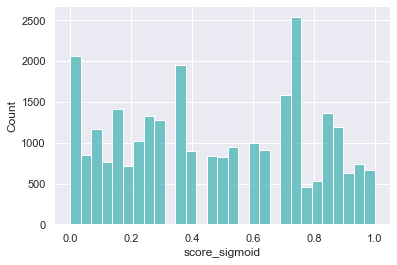

In [26]:
#Check boxplot
a = sns.histplot(data=df_grouped, x="score_sigmoid", color="#47B5B7")
sns.despine(left=True,bottom=True)

In [27]:
#Merge scores back to sidewalk geometry
sidewalk_score = sidewalk.merge(df_grouped, how='inner', on='OBJECTID')
sidewalk_score

,OBJECTID,COMPKEY,COMPTYPE,SEGKEY,UNITID,UNITTYPE,UNITDESC,ADDBY,ADDDTTM,ASBLT,CONDITION,CONDITION_,CURBTYPE,CURRENT_ST,CURRENT__1,FILLERTYPE,FILLERWID,INSTALL_DA,SW_WIDTH,MAINTAINED,MATL,MODBY,MODDTTM,OWNERSHIP,SIDE,SURFTYPE,BUILDERCD,MAINTBYRDW,SWINCOMPLE,MULTIPLESU,GSITYPECD,DATE_MVW_L,PRIMARYDIS,SECONDARYD,OVERRIDEYN,OVERRIDECO,SRTS_SIDEW,PRIMARYCRO,MINIMUMVAR,LAST_VERIF,COLOR,OWNERSHIP_,NATURE_OF_,MAINT_FINA,SW_CATEGOR,VARIABLEWI,MAINTENANC,SHAPE_Leng,geometry,severity,score_sigmoid
0,1,328242,97,9309,SDW-30390,SDW,"BOREN AVE BETWEEN JEFFERSON ST AND JAMES ST, N...",SW DATA LOAD,2007-09-26,None,GOOD,2017-06-30,MONO,INSVC,2010-07-31,TR/PCC,60,None,60,None,None,SIDEWALK COLLECTOR,2018-02-07,None,NE,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,2.3,0,2017-06-30,None,None,None,None,BLOCK,N,SSRP_C4_SWShim,259.226600,"LINESTRING (1273248.570 224553.421, 1273116.53...",1.6,0.832018
1,2,328243,97,9308,SDW-30391,SDW,"BOREN AVE BETWEEN TERRACE ST AND JEFFERSON ST,...",SW DATA LOAD,2007-09-26,None,FAIR,2017-06-30,410A,INSVC,2010-07-31,AC,18,None,96,None,None,SIDEWALK COLLECTOR,2018-02-07,None,SW,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,0.4,0,2017-06-30,None,None,None,None,BLOCK,N,SSRP_C4_SWShim,259.229841,"LINESTRING (1273351.691 224249.508, 1273219.69...",2.8,0.942676
2,3,328244,97,9308,SDW-43317,SDW,"BOREN AVE BETWEEN TERRACE ST AND JEFFERSON ST,...",SW DATA LOAD,2007-09-26,None,GOOD,2017-06-30,410A,INSVC,2010-07-31,LSCP,30,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,NE,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,2.4,0,2017-06-30,None,None,None,None,BLOCK,N,SSRP_C4_SWShim,259.229392,"LINESTRING (1273407.634 224282.605, 1273275.63...",0.8,0.689974
3,4,328245,97,9307,SDW-30392,SDW,"BOREN AVE BETWEEN BROADWAY AND TERRACE ST, SW ...",SW DATA LOAD,2007-09-26,None,GOOD,2017-06-30,410C,INSVC,2010-07-31,LSCP,18,None,96,None,None,SIDEWALK COLLECTOR,2018-02-07,None,SW,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,2.1,0,2017-06-30,None,None,None,None,BLOCK,N,SSRP_C4_SWShim,178.386732,"LINESTRING (1273472.146 224049.812, 1273381.32...",2.0,0.880797
4,5,328246,97,9307,SDW-30393,SDW,"BOREN AVE BETWEEN BROADWAY AND TERRACE ST, NE ...",SW DATA LOAD,2007-09-26,None,EXCELLENT,2017-06-30,410C,INSVC,2010-07-31,LSCP,18,None,72,None,None,SR1146066,2021-08-27,PARK,NE,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.5,0,2017-06-30,None,2021-08-27,None,None,BLOCK,N,SSRP_C4_SWShim,121.582237,"LINESTRING (1273481.718 224157.369, 1273419.81...",0.8,0.689974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27669,46240,325818,97,11868,SDW-42084,SDW,"MINOR AVE BETWEEN JAMES ST AND CHERRY ST, SW SIDE",SW DATA LOAD,2007-09-26,None,FAIR,2017-06-30,MONO,INSVC,2010-07-31,NONE,0,None,90,None,None,SIDEWALK COLLECTOR,2018-02-07,None,SW,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,1.0,1.6,0,2017-06-30,None,None,None,None,BLOCK,N,SSRP_C4_SWShim,279.993952,"LINESTRING (1273319.146 224949.862, 1273176.63...",1.0,0.731059
27670,46242,326436,97,6129,SDW-31758,SDW,"4TH AVE BETWEEN UNIVERSITY ST AND UNION ST, SW...",SW DATA LOAD,2007-09-26,None,GOOD,2017-06-15,G,INSVC,2010-07-31,PCC,52,None,150,None,None,SIDEWALK COLLECTOR,2018-02-07,None,SW,PCC,None,N,N,N,None,2022-06-17,DISTRICT7,None,N,None,3.0,3.3,0,2017-06-15,None,None,None,None,BLOCK,N,SSRP_C5_SWShim,379.150851,"LINESTRING (1270004.020 225475.287, 1269810.82...",1.4,0.802184
27671,46243,326758,97,12199,SDW-30902,SDW,"PIKE ST BETWEEN 3RD AVE AND 4TH AVE, SE SIDE",SW DATA LOAD,2007-09-26,None,GOOD,2017-06-15,G,INSVC,2017-12-19,TR/PCC,118,None,128,None,None,SIDEWALK COLLECTOR,2018-02-07,None,SE,PCC,None,N,N,N,None,2022-06-17,DISTRICT7,None,N,None,3.0,3.0,0,2017-06-15,None,None,None,None,BLOCK,N,SSRP_C5_SWShim,275.864735,"LINESTRING (1269367.276 226037.815, 1269604.64...",2.8,0.942676
27672,4

In [29]:
#Interactive Mapping (uncomment line below)
#sidewalk_score.explore(column='score_sigmoid',tiles="CartoDB positron",scheme='naturalbreaks', tooltip="score_sigmoid",cmap="RdYlGn")

In [31]:
#Read block group geometry
bg = gpd.read_file('datasets/03-block-group-geometry/Census_Block_Groups_2010/Census_Block_Groups_2010.shp')
bg.head()

,OBJECTID,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,INTPTLAT10,INTPTLON10,TRACT,TRBG,TRBG_STR,ACRES_TOTA,ACRES_LAND,ACRES_WATE,WATER,SHAPE_Leng,SHAPE_Area,geometry
0,1,000100,1,530330001001,Block Group 1,+47.7276870,-122.2815160,100,100.1,100.1,588.283002,221.041200,367.285577,NaN,21168.918543,2.562561e+07,"POLYGON ((-122.26840 47.72641, -122.26719 47.7..."
1,2,000100,2,530330001002,Block Group 2,+47.7293165,-122.2924690,100,100.2,100.2,71.258030,71.263215,0.000000,NaN,8692.089186,3.104000e+06,"POLYGON ((-122.28970 47.73193, -122.28965 47.7..."
2,3,000100,3,530330001003,Block Group 3,+47.7228093,-122.2894558,100,100.3,100.3,91.604629,91.611355,0.000000,NaN,8560.645769,3.990298e+06,"POLYGON ((-122.28633 47.72093, -122.28629 47.7..."
3,4,000100,4,530330001004,Block Group 4,+47.7319367,-122.2944531,100,100.4,100.4,31.237245,31.239309,0.000000,NaN,4693.439609,1.360694e+06,"POLYGON ((-122.29237 47.73194, -122.29231 47.7..."
4,5,000100,5,530330001005,Block Group 5,+47.7229283,-122.2944374,100,100.5,100.5,56.956546,56.960756,0.000000,NaN,7450.759251,2.481027e+06,"POLYGON ((-122.29273 47.72019, -122.29273 47.7..."


In [33]:
#Match coordinates
bg = bg.to_crs("EPSG:2285")

In [34]:
#Join with sidewalk dataframe (include access score for sidewalk)
sidewalk_per_bg=sidewalk_score.sjoin(bg, op="within")
sidewalk_per_bg.head()

,OBJECTID_left,COMPKEY,COMPTYPE,SEGKEY,UNITID,UNITTYPE,UNITDESC,ADDBY,ADDDTTM,ASBLT,CONDITION,CONDITION_,CURBTYPE,CURRENT_ST,CURRENT__1,FILLERTYPE,FILLERWID,INSTALL_DA,SW_WIDTH,MAINTAINED,MATL,MODBY,MODDTTM,OWNERSHIP,SIDE,SURFTYPE,BUILDERCD,MAINTBYRDW,SWINCOMPLE,MULTIPLESU,GSITYPECD,DATE_MVW_L,PRIMARYDIS,SECONDARYD,OVERRIDEYN,OVERRIDECO,SRTS_SIDEW,PRIMARYCRO,MINIMUMVAR,LAST_VERIF,COLOR,OWNERSHIP_,NATURE_OF_,MAINT_FINA,SW_CATEGOR,VARIABLEWI,MAINTENANC,SHAPE_Leng_left,geometry,severity,score_sigmoid,index_right,OBJECTID_right,TRACTCE10,BLKGRPCE10,GEOID10,NAMELSAD10,INTPTLAT10,INTPTLON10,TRACT,TRBG,TRBG_STR,ACRES_TOTA,ACRES_LAND,ACRES_WATE,WATER,SHAPE_Leng_right,SHAPE_Area
0,1,328242,97,9309,SDW-30390,SDW,"BOREN AVE BETWEEN JEFFERSON ST AND JAMES ST, N...",SW DATA LOAD,2007-09-26,None,GOOD,2017-06-30,MONO,INSVC,2010-07-31,TR/PCC,60,None,60,None,None,SIDEWALK COLLECTOR,2018-02-07,None,NE,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,2.3,0,2017-06-30,None,None,None,None,BLOCK,N,SSRP_C4_SWShim,259.226600,"LINESTRING (1273248.570 224553.421, 1273116.53...",1.6,0.832018,299,300,008500,2,530330085002,Block Group 2,+47.6055989,-122.3222483,8500,8500.2,8500.2,40.924708,40.926582,0.0,NaN,6954.009655,1.782680e+06
1,2,328243,97,9308,SDW-30391,SDW,"BOREN AVE BETWEEN TERRACE ST AND JEFFERSON ST,...",SW DATA LOAD,2007-09-26,None,FAIR,2017-06-30,410A,INSVC,2010-07-31,AC,18,None,96,None,None,SIDEWALK COLLECTOR,2018-02-07,None,SW,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,0.4,0,2017-06-30,None,None,None,None,BLOCK,N,SSRP_C4_SWShim,259.229841,"LINESTRING (1273351.691 224249.508, 1273219.69...",2.8,0.942676,299,300,008500,2,530330085002,Block Group 2,+47.6055989,-122.3222483,8500,8500.2,8500.2,40.924708,40.926582,0.0,NaN,6954.009655,1.782680e+06
2,3,328244,97,9308,SDW-43317,SDW,"BOREN AVE BETWEEN TERRACE ST AND JEFFERSON ST,...",SW DATA LOAD,2007-09-26,None,GOOD,2017-06-30,410A,INSVC,2010-07-31,LSCP,30,None,72,None,None,SIDEWALK COLLECTOR,2018-02-07,None,NE,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,2.4,0,2017-06-30,None,None,None,None,BLOCK,N,SSRP_C4_SWShim,259.229392,"LINESTRING (1273407.634 224282.605, 1273275.63...",0.8,0.689974,299,300,008500,2,530330085002,Block Group 2,+47.6055989,-122.3222483,8500,8500.2,8500.2,40.924708,40.926582,0.0,NaN,6954.009655,1.782680e+06
3,4,328245,97,9307,SDW-30392,SDW,"BOREN AVE BETWEEN BROADWAY AND TERRACE ST, SW ...",SW DATA LOAD,2007-09-26,None,GOOD,2017-06-30,410C,INSVC,2010-07-31,LSCP,18,None,96,None,None,SIDEWALK COLLECTOR,2018-02-07,None,SW,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,2.1,0,2017-06-30,None,None,None,None,BLOCK,N,SSRP_C4_SWShim,178.386732,"LINESTRING (1273472.146 224049.812, 1273381.32...",2.0,0.880797,299,300,008500,2,530330085002,Block Group 2,+47.6055989,-122.3222483,8500,8500.2,8500.2,40.924708,40.926582,0.0,NaN,6954.009655,1.782680e+06
4,5,328246,97,9307,SDW-30393,SDW,"BOREN AVE BETWEEN BROADWAY AND TERRACE ST, NE ...",SW DATA LOAD,2007-09-26,None,EXCELLENT,2017-06-30,410C,INSVC,2010-07-31,LSCP,18,None,72,None,None,SR1146066,2021-08-27,PARK,NE,PCC,None,N,N,N,None,2022-06-17,DISTRICT3,None,N,None,3.0,1.5,0,2017-06-30,None,2021-08-27,None,None,BLOCK,N,SSRP_C4_SWShim,121.582237,"LINESTRING (1273481.718 224157.369, 1273419.81...",0.8,0.689974,299,300,008500,2,530330085002,Block Group 2,+47.6055989,-122.3222483,8500,8500.2,8500.2,40.924708,40.926582,0.0,NaN,6954.009655,1.782680e+06


In [35]:
#Normalizing score by sidewalk lengths
sidewalk_per_bg = sidewalk_per_bg[['GEOID10','score_sigmoid','SHAPE_Leng_left']]
sidewalk_per_bg = sidewalk_per_bg.rename(columns={'SHAPE_Leng_left': 'sidewalk_leng'})
sidewalk_per_bg['score_sigmoid*leng'] = sidewalk_per_bg['score_sigmoid']*sidewalk_per_bg['sidewalk_leng']
sidewalk_per_bg

,GEOID10,score_sigmoid,sidewalk_leng,score_sigmoid*leng
0,530330085002,0.832018,259.226600,215.681297
1,530330085002,0.942676,259.229841,244.369704
2,530330085002,0.689974,259.229392,178.861665
3,530330085002,0.880797,178.386732,157.122512
4,530330085002,0.689974,121.582237,83.888641
...,...,...,...,...
25971,530330083001,0.768525,295.382391,227.008688
25793,530330116004,0.731059,303.650307,221.986162
25794,530330116004,0.880797,303.650635,267.454592
25834,530330116004,0.731059,606.532990,443.411146


In [36]:
#Group by block group
sidewalk_per_bg = sidewalk_per_bg.groupby(by=["GEOID10"]).sum()

In [37]:
#Normalize by total lengths of sidewalk in each neighbourhood
sidewalk_per_bg['bg_score_sigmoid'] = sidewalk_per_bg['score_sigmoid*leng']/sidewalk_per_bg ['sidewalk_leng']
sidewalk_per_bg

,score_sigmoid,sidewalk_leng,score_sigmoid*leng,bg_score_sigmoid
GEOID10,,,,
530330004012,1.768824,4366.894192,975.916164,0.223481
530330004023,0.354344,305.668468,108.311694,0.354344
530330004024,6.439873,4715.846262,2965.313681,0.628798
530330005002,0.454094,1272.567412,288.932897,0.227047
530330006004,3.174933,1955.183724,1533.960635,0.784561
...,...,...,...,...
530330111024,3.967866,4646.801586,2027.538681,0.436330
530330112002,0.953031,518.631145,247.135871,0.476516
530330114023,1.738946,620.717724,539.697302,0.869473


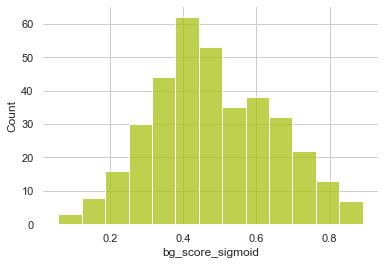

In [38]:
#Check boxplot
sns.set_style("whitegrid")
b=sns.histplot(data=sidewalk_per_bg, x="bg_score_sigmoid", color= "#A9C213")
sns.despine(left=True,bottom=True)

In [43]:
sidewalk_per_bg= sidewalk_per_bg[['bg_score_sigmoid']].reset_index()                               

In [44]:
sidewalk_per_bg

,GEOID10,bg_score_sigmoid
0,530330004012,0.223481
1,530330004023,0.354344
2,530330004024,0.628798
3,530330005002,0.227047
4,530330006004,0.784561
...,...,...
358,530330111024,0.436330
359,530330112002,0.476516
360,530330114023,0.869473
361,530330116004,0.646167


In [45]:
sidewalk_per_bg.to_csv('datasets/05-access-score/access-score-per-bg_20220830.csv',index=False)

In [46]:
#Interactive Mapping (uncomment line below)
#df.explore(column ="bg_score_sigmoid",tiles="CartoDB positron", tooltip ="bg_score_sigmoid",style_kwds=dict(weight=1))